In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv("datasets/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [28]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [29]:
df['MaritalStatus'].replace('Single','Unmarried',inplace=True)

In [30]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [31]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [32]:
df['Gender'].replace('Fe Male','Female',inplace=True)

In [33]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [34]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [35]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [36]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [37]:
# checking for null values
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_with_na:
    print("{} has {} null values".format(feature, df[feature].isnull().sum()))

Age has 226 null values
TypeofContact has 25 null values
DurationOfPitch has 251 null values
NumberOfFollowups has 45 null values
PreferredPropertyStar has 26 null values
NumberOfTrips has 140 null values
NumberOfChildrenVisiting has 66 null values
MonthlyIncome has 233 null values


In [38]:
# Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# typeofcontact
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

# DurationOfPitch
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)

# NumberOfFollowups
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)

# PreferredPropertyStar
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

# NumberOfTrips
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)

# NumberOfChildrenVisiting
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

# MonthlyIncome
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [39]:
df.drop('CustomerID', axis=1, inplace=True)

In [40]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [ ]:
# creating a new column for total number of people visiting
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [42]:
# Splitting features into numerical and categorical
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [45]:
print(len(num_features), "numerical features")
print(len(cat_features), "categorical features")

12 numerical features
6 categorical features


In [46]:
# Identifying discrete and continuous features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) < 20]
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(len(discrete_features), "discrete features")
print(len(continuous_features), "continuous features")

9 discrete features
3 continuous features


In [47]:
# Splitting the dataset into features and target variable
from sklearn.model_selection import train_test_split
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [48]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [49]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [50]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [70]:
# create column transformers with 3 types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Define the column transformer
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_features),
                                                ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), cat_features)],
                                                remainder='passthrough')

In [71]:
# Remove 'ProdTaken' from num_features if present
if 'ProdTaken' in num_features:
	num_features.remove('ProdTaken')

# Ensure X_train and X_test are DataFrames before transforming
X_train = X.loc[y_train.index]
X_test = X.loc[y_test.index]

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [72]:
X_train.shape, X_test.shape

((3910, 26), (978, 26))

In [75]:
# Create a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [76]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train the model

    # make predictions
    y_test_pred = model.predict(X_test) 
    y_train_pred = model.predict(X_train)

    # evaluate the test model
    model_accuracy = accuracy_score(y_test, y_test_pred)
    model_precision = precision_score(y_test, y_test_pred)
    model_recall = recall_score(y_test, y_test_pred)
    model_f1 = f1_score(y_test, y_test_pred)
    model_roc_auc = roc_auc_score(y_test, y_test_pred)

    # evaluate the train model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    model_roc_auc = roc_auc_score(y_train, y_train_pred)

    print(f"Model: {list(models.keys())[i]}")
    print('Model performance on test set:')
    print(f"Test Accuracy: {model_accuracy}")
    print(f"Test Precision: {model_precision}")
    print(f"Test Recall: {model_recall}")
    print(f"Test F1 Score: {model_f1}")
    print(f"Test ROC AUC: {model_roc_auc}")

    print('------------------------------------------------------------')

    print('Model performance on train set:')
    print(f"Train Accuracy: {train_accuracy}")  
    print(f"Train Precision: {train_precision}")
    print(f"Train Recall: {train_recall}")  
    print(f"Train F1 Score: {train_f1}")
    print(f"Train ROC AUC: {model_roc_auc}")
    
    print('='*50)
    print('\n')


Model: Random Forest
Model performance on test set:
Test Accuracy: 0.934560327198364
Test Precision: 0.96875
Test Recall: 0.6739130434782609
Test F1 Score: 0.7948717948717948
Test ROC AUC: 1.0
------------------------------------------------------------
Model performance on train set:
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0
Train ROC AUC: 1.0


Model: Decision Tree
Model performance on test set:
Test Accuracy: 0.9049079754601227
Test Precision: 0.7660818713450293
Test Recall: 0.7119565217391305
Test F1 Score: 0.7380281690140845
Test ROC AUC: 1.0
------------------------------------------------------------
Model performance on train set:
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0
Train ROC AUC: 1.0


Model: Logistic Regression
Model performance on test set:
Test Accuracy: 0.8312883435582822
Test Precision: 0.6266666666666667
Test Recall: 0.2554347826086957
Test F1 Score: 0.36293436293436293
Test ROC AUC: 0.655235

In [77]:
# hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2', 5, 10, 15]
}

In [78]:
# models list for hyperparameter tuning
models = [
    ('RF', RandomForestClassifier(), rf_params)
]

In [79]:
from sklearn.model_selection import RandomizedSearchCV
models_params = {}
for name, model, params in models:
    search = RandomizedSearchCV(model, params, n_iter=100, cv=3, scoring='accuracy', random_state=42, n_jobs=-1, verbose=2)
    search.fit(X_train, y_train)
    models_params[name] = search.best_params_

for model_name in models_params:
    print(f"Best parameters for {model_name}: {models_params[model_name]}")
    print('='*50)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for RF: {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 15, 'max_depth': 20}


In [ ]:
# Train the Random Forest model with the best parameters
models = {
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42, min_samples_split=2,
                                             max_depth=20, max_features=15)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train the model

    # make predictions
    y_test_pred1 = model.predict(X_test) 
    y_train_pred1 = model.predict(X_train)

    # evaluate the test model
    model_accuracy = accuracy_score(y_test, y_test_pred1)
    model_precision = precision_score(y_test, y_test_pred1)
    model_recall = recall_score(y_test, y_test_pred1)
    model_f1 = f1_score(y_test, y_test_pred1)
    model_roc_auc = roc_auc_score(y_test, y_test_pred1)

    # evaluate the train model
    train_accuracy = accuracy_score(y_train, y_train_pred1)
    train_precision = precision_score(y_train, y_train_pred1)
    train_recall = recall_score(y_train, y_train_pred1)
    train_f1 = f1_score(y_train, y_train_pred1)
    model_roc_auc = roc_auc_score(y_train, y_train_pred1)

    print(f"Model: {list(models.keys())[i]}")
    print('Model performance on test set:')
    print(f"Test Accuracy: {model_accuracy}")
    print(f"Test Precision: {model_precision}")
    print(f"Test Recall: {model_recall}")
    print(f"Test F1 Score: {model_f1}")
    print(f"Test ROC AUC: {model_roc_auc}")

    print('------------------------------------------------------------')

    print('Model performance on train set:')
    print(f"Train Accuracy: {train_accuracy}")  
    print(f"Train Precision: {train_precision}")
    print(f"Train Recall: {train_recall}")  
    print(f"Train F1 Score: {train_f1}")
    print(f"Train ROC AUC: {model_roc_auc}")
    
    print('='*50)
    print('\n')

Model: Random Forest
Model performance on test set:
Test Accuracy: 0.941717791411043
Test Precision: 0.9319727891156463
Test Recall: 0.7445652173913043
Test F1 Score: 0.8277945619335347
Test ROC AUC: 1.0
------------------------------------------------------------
Model performance on train set:
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0
Train ROC AUC: 1.0




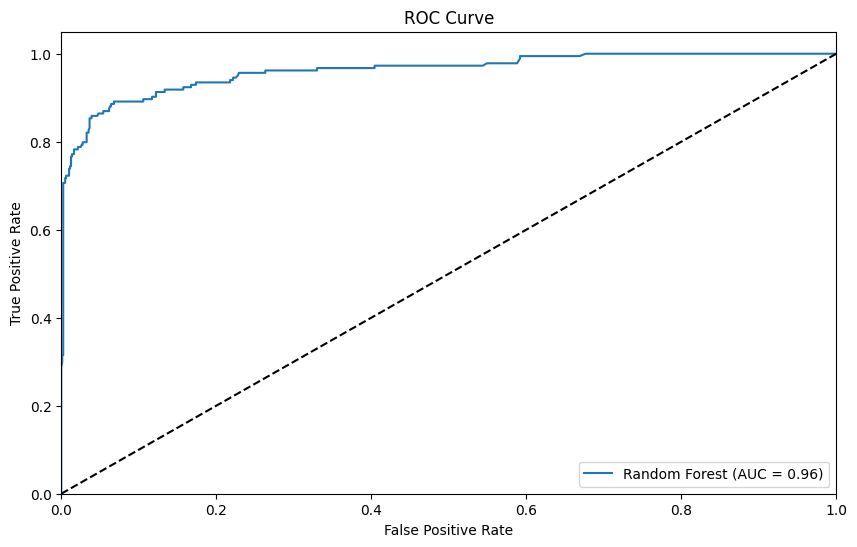

In [81]:
# plot ROC AUC curve
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10, 6))

# add the models to the list that you want to plot on the ROC curve
auc_models = [
    {
        'label': 'Random Forest',
        'model': RandomForestClassifier(n_estimators=1000, random_state=42, min_samples_split=2,
                                        max_depth=20, max_features=15),
        'auc': 1.0
    }
]

# loop over the models
for auc_model in auc_models:
    model = auc_model['model'] # create a new model instance
    model.fit(X_train, y_train) # train the model on the training data
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # calculate false positive rate, true positive rate, and thresholds
    # and plot the ROC curve
    fpr, tpr, threshhold = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    # and plot the ROC curve
    plt.plot(fpr, tpr, label=f"{auc_model['label']} (AUC = {roc_auc:.2f})")
    # custom settings for the plot
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('ROC Curve')
    plt.show()